In [6]:
#Imports
import numpy as np
import matplotlib.pyplot as plt
from math import pi, sin
import scipy.signal

In [7]:
def sampled_sin (signal, Ts, tmin, tmax):
    n = np.arange((int)(tmin / Ts), (tmax / Ts))
    y_out = map(lambda m : signal(m*Ts), n)
    
    return n, list(y_out)

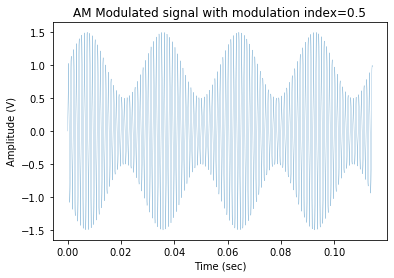

In [8]:
""" 3.a """

""" ΑΜ: 03115082 άρα 0+8+2=10 και 1+0=1 οπότε fm = 1 kHz """
fm = 1*10**3 #Hz
Tm = 1.0 / fm #sec
A = 1 #Volt
z = lambda t : A*sin(2*pi*fm*t) #carrier signal

fs2 = 130 * fm
Ts2 = 1.0 / fs2
mod_index = 0.5
f = 35
T = 1.0 / f
m = lambda t : sin(2*pi*f*t) #base band signal

s = lambda t : (1 + mod_index * m(t)) * z(t)

tmin, tmax = 0, 4*T #4 periods
n, y = sampled_sin (s, Ts2, tmin, tmax)

plt.plot(n*Ts2, y, linewidth=0.2)
plt.title('AM Modulated signal with modulation index=0.5')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

In [16]:
from scipy.signal import hilbert

def envelope_detector(signal):
    """ Returns the absolute value of the hilbert transformation of the given signal """
    analytic_signal = hilbert(signal)
    
    return np.abs(analytic_signal)

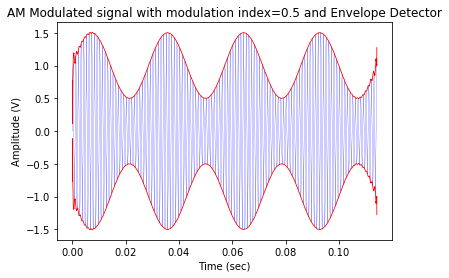

ValueError: x and y must have same first dimension, but have shapes (14858,) and (1,)

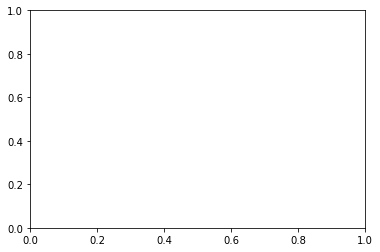

In [37]:
""" 3.b """
amplitude_envelope = envelope_detector(y)

plt.plot(n*Ts2, y, '-b', linewidth=0.2) #AM signal
plt.plot(n*Ts2, amplitude_envelope, '-r', linewidth=0.8) #upper envelope
plt.plot(n*Ts2, -amplitude_envelope, '-r', linewidth=0.8) #lower envelope
plt.title('AM Modulated signal with modulation index=0.5 and Envelope Detector')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()


plt.plot(n*Ts2, m, linewidth=0.8)
plt.title('Initial base band signal m(t) before dodulation')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()

demodulated_signal = 2*(amplitude_envelope - 1)
plt.plot(n*Ts2, demodulated_signal, linewidth=0.8)
plt.title('Initial base band signal m(t) after demodulation with envelope detector')
plt.xlabel('Time (sec)')
plt.ylabel('Amplitude (V)')
plt.show()